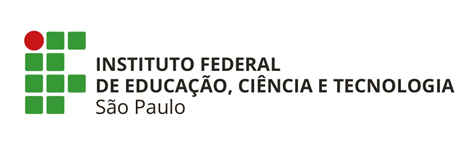

<h1><center>Primeira Avaliação</center></h1>
<br>

<h3><center>ANÁLISE ESTATÍSTICA PARA CIÊNCIA DE DADOS (D1AED)</center></h3>
<br>

<h3><center>Pós Graduação – Ciência de Dados
<br>
Professores: Ricardo Sovat e Samuel Martins</center></h3>

<br>
<br>

<h4><right>Ede Miranda Júnior – CP3013596
<br>
Vitor Felipe Facanali Godoy – CP3013669</right></h4>
<br>
<br>

<h3><center>Campinas, São Paulo</center></h3>





#Inicialização das Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
!pip install IMDbPY
import imdb

#Carregamento dos datasets

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Semestre 1/ANALISE ESTATÍSTICA PARA CIÊNCIA DE DADOS/AVALIAÇÕES/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Semestre 1/ANALISE ESTATÍSTICA PARA CIÊNCIA DE DADOS/AVALIAÇÕES/ml-latest-small/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/Semestre 1/ANALISE ESTATÍSTICA PARA CIÊNCIA DE DADOS/AVALIAÇÕES/ml-latest-small/tags.csv')
links = pd.read_csv('/content/drive/MyDrive/Semestre 1/ANALISE ESTATÍSTICA PARA CIÊNCIA DE DADOS/AVALIAÇÕES/ml-latest-small/links.csv')

#Exercício 1 - Descrição da base de dados escolhida

##Descrição de cada arquivo

In [ ]:
print(movies.head())
print(movies.info())

   movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


In [ ]:
print(ratings.head())
print(ratings.info())

ratings_range = ratings['rating'].unique()
print(ratings_range)

   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
[4.  5.  3.  2.  1.  4.5 3.5 2.5 0.5 1.5]


In [ ]:
print(tags.head())
print(tags.info())

   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


In [ ]:
print(links.head())
print(links.info())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None


Analisando o dataset, composto de 4 tabelas no formato cvs, junto ao arquivo *README.txt*, consegue-se obter quais informações cada arquivo possui.

Essas informações são referente à 9742 filmes, analisados por 610 usuários entre março de 1996 à setembro de 2018, sendo gerado no dia 26 de setembro de 2018.

A primeira tabela, *movies*, é composta de 3 colunas, sendo elas a '**movieID**', '**title**' e '**genres**', as quais representam um ID único para cada filme analisado nesse estudo, o título desse filme e quais os gêneros atribuidos a cada um deles, respectivamente, extraidos do site [MovieLens](http://movielens.org) 

A segunda tabela, *rating*, é composta por 4 colunas, sendo elas a '**movieID**', '**userID**', que representa um código único para o usuário que atribuiu os valores de '**rating**' para cada filme, '**rating**', sendo um valor de 0 à 5 dado pelos usuários para cada filme e, por fim, a coluna '**timestamp**' que representa quando foi realizado essa atribuilção.

Por sua vez, a tabela *tags*, também composta por 4 colunas, trás as colunas '**movieID**', '**userID**' e '**timestamp**', já comentadas anteriormente, e a coluna '**tag**' que possui as tags atribuidas por cada usuário para cada filme.

Por fim, a tabela '*link*', possui as colunas '**movieID**', '**imdbId**', que representa o ID do filme em questão no site *IMDB*, e a coluna '**tmdbId**', que é um identificadador, assim como os demais, para o site *The Movie DB*.


##Descrição de cada coluna

Abaixo, tem-se quatro tabelas descrevendo o tipo de dado de cada coluna do dataset.

Tabela 1: Movies

Coluna | Tipo de dado | Subtipo |
:----|:----:|:----:
movieID | Categórico | Ordinal |
title | Categórico | Nominal |
genres | Categórico | Nominal |


Tabela 2: Rating

Coluna | Tipo de dado | Subtipo |
:----|:----:|:----:
movieID | Categórico | Ordinal |
userID | Categórico | Ordinal |
rating | Categórico | Nominal |
timestamp | Categórico | Nominal |

Tabela 3: Tags

Coluna | Tipo de dado | Subtipo |
:----|:----:|:----:
movieID | Categórico | Ordinal |
userID | Categórico | Ordinal |
tag | Categórico | Nominal |
timestamp | Categórico | Nominal |

Tabela 4: Link

Coluna | Tipo de dado | Subtipo |
:----|:----:|:----:
movieID | Categórico | Ordinal |
imdbId | Categórico | Nominal |
tmdbId | Categórico | Nominal |

#Exercício 2 - Preparação da base de dados

Foram realizadas tarefas de renomeação, mesclagem das tabelas, conversão de formatos de dados e reorganização dos dados em colunas. As tarefas são detalhadas abaixo:

In [ ]:
dummies = movies['genres'].str.get_dummies('|') #Dividindo os gêneros por colunas
movies = pd.concat([movies, dummies], axis=1) #Concatenando a nova tabela de gêneros com o dataset movies
movies = movies.drop(columns='genres') #Removendo a coluna "genres"

In [ ]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s') #Convertendo a coluna "timestamp" para o formato DateTime
ratings = ratings.rename(columns={"timestamp": "date"}) #Renomeando a coluna "timestamp" para "date"
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')
tags = tags.rename(columns={"timestamp": "date"})

In [ ]:
df1 = movies.merge(ratings) #Criando o dataset "df1" contendo os datasets Movies e Ratings mesclados
df2 = movies.merge(tags) #Criando o dataset "df2" contendo os datasets Movies e Tags mesclados

Foi realizado a contagem do número de avaliações que cada filme recebeu e criado o dataset "df1_grouped" que contém os filmes agrupados pela média de avaliações recebidas

In [ ]:
df1['rating_numbers'] = df1.groupby(['title'])['rating'].transform('count') #Contando as avaliações recebidas por cada filme
df1_grouped = df1.groupby('title').mean('rating').reset_index() #Agrupando os filmes pela média de avaliações

# Exercício 3 - Análise exploratória


##Pergunta 1 – Existe alguma correlação entre o ano de lançamento do filme e sua avaliação média (média de ratings)?

Como a variável df1_grouped já possui as informações de avaliação média por filme, criou-se um novo dataframe com três colunas, sendo elas o ano de lançamente do filme (movie_release), sua avaliação média (rating_mean) e a quantidade de avaliações recebidas (rating_numbes), com o intuito de saber se a avaliação média possui alguma relação com a quantidade de avaliações para os filmes lançados por ano, todas sendo extraidos da variável df1_grouped presente no ítem aterior.

In [ ]:
df3_1 = ''
df3_1_grouped = ''
df3_1 = pd.DataFrame(columns = ['movie_release','rating_mean','rating_numbers']) #iniciando o df com três colunas

df3_1['movie_release'] = df1_grouped['title'].str.split('(').str[-1] #como o ano de lançamento está entre parenteses e é o ultimo argumento da string, divisou-se a string passando o caracter '(' e pagando o ultimo parâmetro
df3_1['movie_release'] = df3_1['movie_release'].str.replace(')',"") #removendo o ')'

df3_1['rating_numbers'] = df1_grouped['rating_numbers']
df3_1['rating_numbers'] = df3_1['rating_numbers'].astype(int)

aux = df3_1.drop(['rating_mean'], axis =1)

df3_1['rating_mean'] = df1_grouped['rating'] #inserindo a avaliação à cada linha
df3_1_grouped = df3_1.groupby('movie_release').mean('rating_mean').reset_index() #agrupando por ano e informando a média
aux = aux.groupby('movie_release').sum('rating_numbers').reset_index() #agrupando por ano e somando a quantidade de avaliações
df3_1_grouped['rating_numbers'] = aux['rating_numbers']

df3_1_grouped = df3_1_grouped[df3_1_grouped['movie_release'].str.isdigit() == True] #removendo as linhas que não possuem data de lançamento
df3_1_grouped['movie_release'] = df3_1_grouped['movie_release'].astype(int)

df3_1_grouped

,movie_release,rating_mean,rating_numbers
0,1902,3.500000,5
1,1903,2.500000,2
2,1908,4.000000,1
3,1915,2.000000,1
4,1916,3.562500,5
...,...,...,...
110,2014,3.110263,1318
112,2015,3.069094,1088
113,2016,3.103748,785
114,2017,3.376749,461


Após a criação do dataframe, analisou-se a média das avaliações dos filmes lançados por ano e sua relação utulizando a função 'corr'.

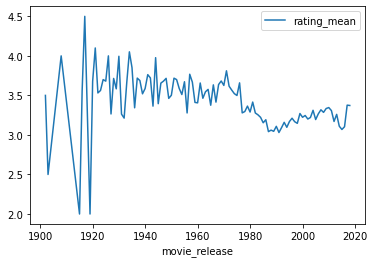

In [ ]:
df3_1_grouped.plot(x = 'movie_release', y = 'rating_mean')

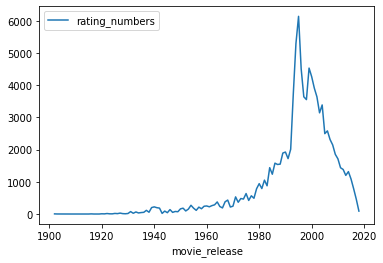

In [ ]:
df3_1_grouped.plot(x = 'movie_release', y = 'rating_numbers')

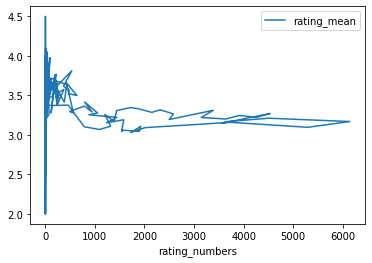

In [ ]:
df3_1_grouped.plot(x = 'rating_numbers', y = 'rating_mean')

In [ ]:
df3_1_grouped.corr()

,movie_release,rating_mean,rating_numbers
movie_release,1.000000,-0.349281,0.666783
rating_mean,-0.349281,1.000000,-0.381367
rating_numbers,0.666783,-0.381367,1.000000


Pode-se notar que há uma linha de tendência negativa ao analisar o ano de lançamento e sua avaliação méia, especialmente a partir da década de 20, gerando uma correlação de -0.35, aproximadamente, e que essa relação também está correlacionada com a quantidade de avaliações recebidas por ano, no qual, fica evidenciado que filmes com mais de 500 avaliações tendem a ter notas entre 3.0 e 3.5, sendo que a maioria dos filmes após 1970 se enquadram nessa análise

##Pergunta 2 – Qual o grupo mais disperso, o de usuários que avaliaram ou o de usuários que rotularam filmes? 

Para a verificação dos grupos mais dispersos foi realizado a plotagem de um histograma, tanto para os usuários que avaliaram (Rating) quanto para os que rotularam (Tag)

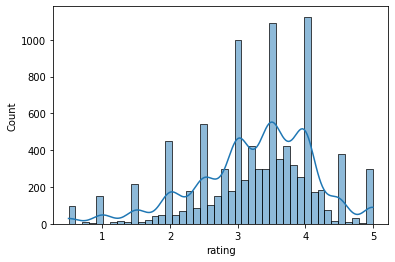

In [ ]:
sns.histplot(data=df1_grouped, x='rating', kde=True)

[[]]

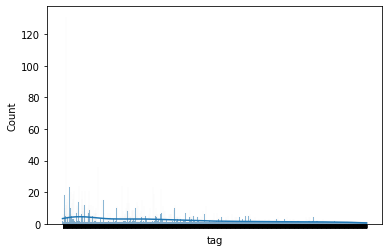

In [ ]:
sns.histplot(data=df2, x='tag', kde=True).set(xticklabels=[]) 

Pode-se notar que o grupo mais disperso, são os dos usuários que rotularam, devido o atributo 'tag' possuir variáveis categóricas, o que permite que os usuários possam rotular os filmes de N formas, diferente do atributo 'ratings' que possui variáveis discretas, limitando a avaliaçao dos usuários entre 1 a 5

## Pergunta 3 – Qual a categoria rotulada mais frequente?


Para analisar a categoria que foi rotulada mais frequentemente, foi realizado a contagem dos rótulos e ordenados de forma decrescente

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


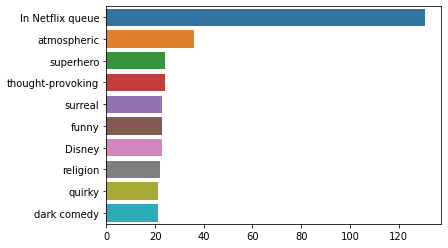

In [ ]:
most_frequency_tags = df2['tag'].value_counts()[:10].sort_values(ascending=False) #Contando os rótulos e ordenando os 10 mais frequentes em ordem descrescente
sns.barplot(most_frequency_tags.values,most_frequency_tags.index)

In [ ]:
percent = most_frequency_tags.values[0]/most_frequency_tags.values[1]*100
print(round(percent,2),"%")

363.89 %


Nota-se que entre os 10 mais frequente, o rótulo mais frequente foi "In Netflix queue" sendo 363,8% mais frequente que o segundo colocado ("atmospheric")

##Pergunta 4 – Como estão distribuídas as avaliações ao longo do tempo?


Para a análise da distribuição das avaliações ao longo do tempo, foi feito um histograma

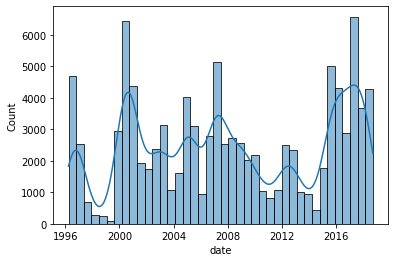

In [ ]:
sns.histplot(data=ratings, x='date', kde=True)


Nota-se que os períodos em que houve mais avaliações foram entre 2000 a 2001, e entre 2015 a 2018. Tendo esses dois períodos números bem parecidos.

O período com menos avaliações foram entre 1998 e 1999.

##Pergunta 5 - Quais os gêneros mais bem avaliados

Utiliazando a variável df1_grouped, a qual possui todos os gêneros por filme, dispostos em colunas, e a sua avaliação média, gerou-se um novo DataFrame com os filmes que possuem pelo menos um gênero declarado e fez-se uma interação entre todas as colunas, filtrando uma a uma os títulos que possuem o gênero interado, retornando a média da sua avaliação e sua mediana.

In [ ]:
df3_5 = df1_grouped[df1_grouped['(no genres listed)'] == 0] #filtrando apenas os filmes que possuem um gênero declarado
df3_5 = df3_5.drop(['(no genres listed)','userId','rating_numbers','movieId','title'], axis=1) 
genres = []
rating_mean = []
rating_median = []
for column in df3_5: #interando todas as colunas (gêneros)
  aux = df3_5[df3_5[column] == 1] #filtrando apenas os filmes que possuem o gênero analisado nesse momento
  genres.append(column)
  rating_mean.append(aux.rating.mean()) #analisando a avaliação média de todos os filmes com esse gênero
  rating_median.append(aux.rating.median()) #analisando a mediana da avaliação de todos os filmes com esse gênero

df3_5 = pd.DataFrame({'genres': genres,
     'rating_mean': rating_mean,
     'rating_median': rating_median})

print(df3_5.sort_values(by=['rating_mean'], ascending=False))

         genres  rating_mean  rating_median
6   Documentary     3.781682       4.000000
9     Film-Noir     3.670471       3.812500
17          War     3.571655       3.750000
2     Animation     3.497119       3.531751
7         Drama     3.420588       3.500000
18      Western     3.383389       3.500000
14      Romance     3.363977       3.500000
13      Mystery     3.330364       3.500000
11         IMAX     3.311996       3.350160
5         Crime     3.301281       3.454545
12      Musical     3.296371       3.500000
8       Fantasy     3.218843       3.352419
1     Adventure     3.215254       3.333333
4        Comedy     3.181309       3.250000
16     Thriller     3.155954       3.250000
3      Children     3.107690       3.174242
15       Sci-Fi     3.103199       3.211310
0        Action     3.094547       3.200000
10       Horror     2.918965       3.000000
19       rating     1.000000       1.000000


Com isso, pode-se concluir que os filmes que possuem como gênero *Documenary*, *Film-Noir*, *War*, *Animation* ou *Drama* possuem melhores avaliações

##Pergunta 6 - Tags menos frequentes

Para a análise das Tags menos frequentes, foram realizado a contagem e a ordenação de forma crescente

In [ ]:
least_frequency_tags = df2['tag'].value_counts()[:].sort_values(ascending=True) #Contando os rótulos e ordenando os 10 menos frequentes em ordem crescente
least_frequency_tags.head(10)

road trip        1
spiders          1
history          1
"artsy"          1
poorly paced     1
Sinbad           1
system holism    1
fairy tale       1
MacBeth          1
gangs            1
Name: tag, dtype: int64

São exibidos os 10 menos frequêntes. Porém, devido a variável Tag ser categórica, há muitos valores únicos. Então abaixo, foi armazenado as Tags com apenas 1 frequencia.

In [ ]:
least_frequency_tags2 = least_frequency_tags.index[least_frequency_tags.values == 1]
least_frequency_tags2

Index(['road trip', 'spiders', 'history', '"artsy"', 'poorly paced', 'Sinbad',
       'system holism', 'fairy tale', 'MacBeth', 'gangs',
       ...
       'Kevin Costner', 'meaningless violence', 'political right versus left',
       'predictible plot', 'planes', 'r:strong language', 'ferris wheel',
       'cliche characters', 'tedious', 'governess'],
      dtype='object', length=1038)

##Pergunta 7 - Relação entre Tag e Rating, quais as 10 Tags mais bem avaliadas?

Para analisar quais as 10 tags que aparecem mais bem avaliadas, utizou-se as colunas 'movieId' e 'tag', presentes na variável df2, e as colunas 'movieId' e 'rating', presentes na variável df1, com o intuito de montar-se um *Data Frame* que conte-se a relação 'Tag' x 'Rating'.

Após a montagem desse *Data Frame*, agrupou-se as linhas a partir de sua tag e calculou-se a média das avaliações dos filmes que contiam a tag em questão, explicitados na tabela abaixo.

In [ ]:
df3_7_tags = df2[['movieId', 'tag']] #armazenando apenas as colunas 'movieId' e 'tag'
df3_7_rating = df1[['movieId', 'rating']] #armazenando apenas as colunas 'movieId' e 'rating'
df3_7 = pd.merge(df3_7_tags, df3_7_rating, on='movieId') #criando o data frame

df3_7 = df3_7.drop_duplicates() #limpando as linhas duplicadas
df3_7 = df3_7.drop(['movieId'], axis = 1)

df3_7_grouped = df3_7.groupby('tag').mean('rating').reset_index() #analisando a avaliação média por tag

df3_7_grouped = df3_7_grouped.sort_values(by='rating', ascending=False) #ordenando por avaliação
print(df3_7_grouped.head(10))

                      tag  rating
795            creativity    5.00
1188          no dialogue    5.00
924      free to download    5.00
1014         human rights    5.00
1270           procedural    5.00
1163  movies about movies    4.75
1229              parrots    4.75
151              Dystopia    4.50
714     building a family    4.50
544       Viggo Mortensen    4.50


##Pergunta 8 - Top 10 filmes mais bem avaliados possuem as mesmas Tags analisadas anteriormente?

Para checar se os 10 filmes mais bem avaliados possuem as mesmas *tags* analisadas no ítem anterior, utilizou-se a variável df3_7, a qual já possui a relação entre 'tag', 'rating' e 'movieId'.

O primeiro passo foi analisar a avaliação média por filme e filtrar o *Data Frame* gerado com apenas com os 10 filmes que apresentavam a maior média.

Finalizado essa etapa, utilizou-se a função 'merge' para analisar se as *tags* vinculadas aos top 10 filmes apareciam também no Data Frame do ítem anterior (df3_7_grouped).

Com isso, pode-se confirmar que 5, das 10 tags com maiores avaliações, de fato estão relacionadas aos top 10 filmes mais bem avaliados.

In [ ]:
df3_7_rating = df3_7_rating.groupby('movieId').mean('rating') #analisando a avaliação média por filme

df3_8 = pd.merge(df3_7_tags, df3_7_rating, on='movieId') #criando o data frame
df3_8 = df3_8.drop_duplicates() #limpando as linhas duplicadas
df3_8 = df3_8.sort_values(by=['rating', 'movieId'], ascending=False) #ordenando por avaliação

movie_id = df3_8.movieId.drop_duplicates().values
movie_id = movie_id[:9] #selecionando os top 10 filmes

df3_8_top10 = df3_8[df3_8['movieId'].isin(movie_id[:9])] #filtrando o data frame com apenas os top 10 filmes

df3_8_tag = pd.merge(df3_8_top10, df3_7_grouped.head(10), on='tag') #analisando a presença das tags do ítem anterior

print('As tags que aparecem em ambos dataframes são:\n', df3_8_tag.tag.values)



As tags que aparecem em ambos dataframes são:
 ['human rights' 'procedural' 'creativity' 'free to download' 'no dialogue']


##Pergunta 9 - Relação entre a quantidade de tags por ano de lançamento

In [ ]:
df3_9 = df2[['title', 'tag']] #armazenando apenas as colunas 'title' e 'tag'
df3_9['movie_release'] = df3_9['title'].str.split('(').str[-1] #como o ano de lançamento está entre parenteses e é o ultimo argumento da string, divisou-se a string passando o caracter '(' e pagando o ultimo parâmetro
df3_9['movie_release'] = df3_9['movie_release'].str.replace(')',"") #removendo o ')'

df3_9 = df3_9[df3_9['movie_release'].str.isdigit() == True] #removendo as linhas que não possuem data de lançamento
df3_9['movie_release'] = df3_9['movie_release'].astype(int)

df3_9 = df3_9.drop(['title'], axis = 1) #removendo o título do filme

df3_9 = df3_9.groupby('movie_release').count().reset_index() #contando a quantidade de tags por ano de lançamento


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


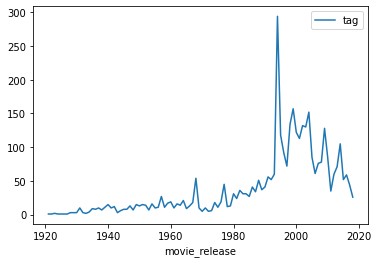

In [ ]:
df3_9.plot(x = 'movie_release', y = 'tag')

In [ ]:
df3_9.corr()

,movie_release,tag
movie_release,1.000000,0.666868
tag,0.666868,1.000000


##Pergunta 10 - Prever o rating a partir dos generos de um filme novo (Sem Remorso)

Para a previsão de um novo filme, foi criado um novo Dataset contendo os dados do gênero do filme Sem Remorso de 2021. Os dados foram obtidos no site do [IMDb](https://www.imdb.com/title/tt0499097/).

In [ ]:
columns_list = list(df1_grouped.columns.values.tolist()) #Criando uma lista contendo os nomes dos atributos
columns_list = np.asarray(columns_list) #Convertendo em um array do NumPy
columns_list

array(['title', 'movieId', '(no genres listed)', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'userId',
       'rating', 'rating_numbers'], dtype='<U18')

In [ ]:
new_movie = {'(no genres listed)': [0], 'Action': [1], 'Adventure': [0],
       'Animation': [0], 'Children': [0], 'Comedy': [0], 'Crime': [0], 'Documentary': [0], 'Drama': [0],
       'Fantasy': [0], 'Film-Noir': [0], 'Horror': [0], 'IMAX': [0], 'Musical': [0], 'Mystery': [0],
       'Romance': [0], 'Sci-Fi': [0], 'Thriller': [1], 'War': [1], 'Western': [0]} #Criando um dicionário com os dado gêneros do filme Sem Remorço
new_movie_df = pd.DataFrame(new_movie) #Criando um DataFrame com os dados do dicionário
new_movie_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


Em seguida foi criado, dois novos DataFrames, o "X" contém somente os gêneros, e o "y" contém as avaliações.

Esses dados foram treinados, e logo após foram usados para prever a avaliação do filme Sem Remorso.

In [ ]:
X = df1_grouped.drop(columns=['movieId', 'title', 'userId','rating_numbers','rating']) #Criando um novo DataFrame com somente dados dos gêneros
y = df1_grouped['rating'] #Criando uma Series com dados das avaliações

In [ ]:
regr = SVR(C=500) #Instanciando o Support Vector Regression
regr.fit(X, y) #Treinando os dados

SVR(C=500, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
predict_SVR = regr.predict(new_movie_df) #Prevendo avaliação do filme Sem Remorso

In [ ]:
print(np.round(predict_SVR,1)) #Imprimindo avaliação arredondada

[3.1]


In [ ]:

ia = imdb.IMDb() #Criando instância
  
code = "0499097" #Atribuindo o código do filme a variável "code"
  
series = ia.get_movie(code) #Recuperando informações do filme
  
rating_series = series.data['rating'] #Recuperando informações de avaliação
  
new_rating = rating_series*5/10 #Convertendo a avaliação em uma escala de 0 a 5
new_rating

2.9

In [ ]:
r2_train = regr.score(X, y)
print('R2 no set de treino: %.2f' % r2_train)

R2 no set de treino: 0.16


Nota-se que a acurácia do modelo é baixa, tendo seu valor em 16%, evidenciando que o gênero do filme não influência sua avaliação. 

O modelo preveu uma valiação de 3,1. Para validar a previsão, foi verificado a avaliação atual do filme nos dados do IMDb, para isso foi utilizado a biblioteca IMDbPY. Com isso notou-se que a previsão foi próxima, com uma diferença de 0,2.

Apesar de termos um resultado bem fidedigno, percebe-se que o valor apresentado está muito mais relacionado à média de avaliações, do que de fato à acurácia do modelo.